In [1]:
import pandas as pd
df=pd.read_csv('diabetes.csv')

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
from matplotlib import pyplot as plt

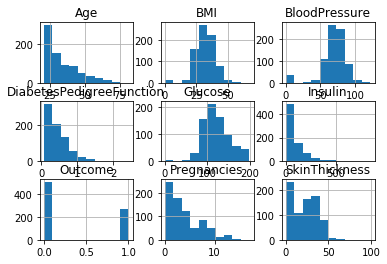

In [6]:
df.hist()
plt.show()

In [7]:
import seaborn as sns

RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density.

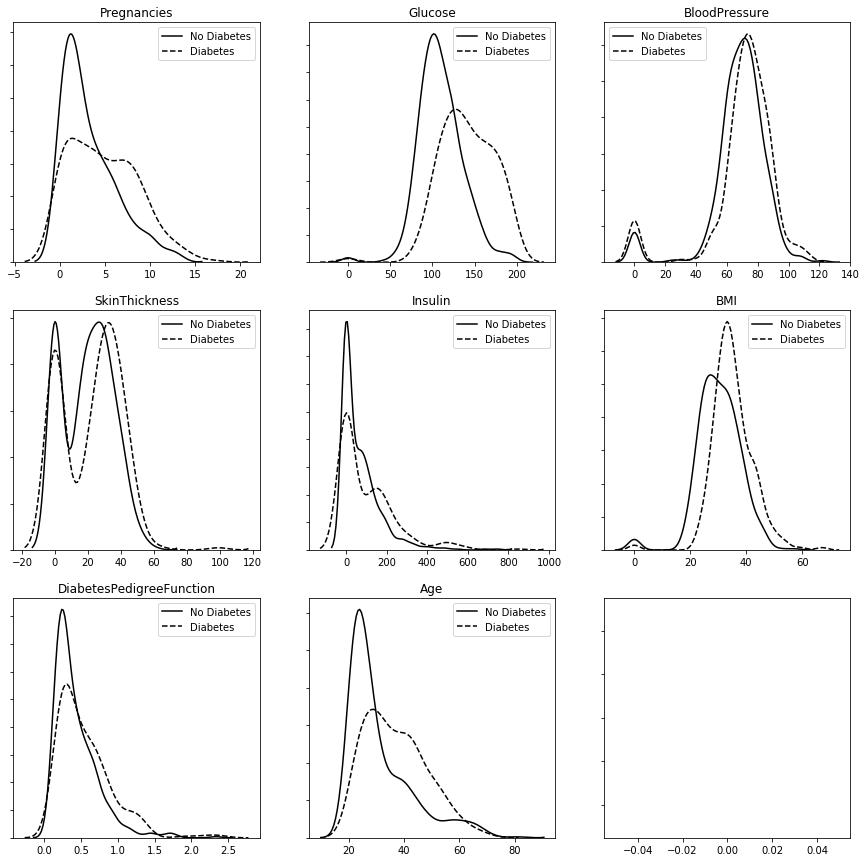

In [11]:
# creating subplot of 3x3
plt.subplots(3,3,figsize=(15,15))

# Plot density function for each variable
for idx, col in enumerate(df.columns):
    ax = plt.subplot(3,3,idx+1)
    ax.yaxis.set_ticklabels([])
    sns.distplot(df.loc[df.Outcome==0][col],hist=False,axlabel=False,kde_kws={'linestyle':'-','color':'black',
                                                                              'label':"No Diabetes"})
    sns.distplot(df.loc[df.Outcome==1][col],hist=False,axlabel=False,kde_kws={'linestyle':'--','color':'black',
                                                                              'label':"Diabetes"})
    ax.set_title(col)

plt.subplot(3,3,9).set_visible(False)
plt.show()
    

In [13]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
print('Number of rows with 0 values for each variable')
for col in df.columns:
    missing_rows = df.loc[df[col]==0].shape[0]
    print(col+": "+str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [16]:
import numpy as np

In [17]:
# Replacing 0 values 
df.Glucose = df.Glucose.replace(0,np.nan)
df.BloodPressure = df.BloodPressure.replace(0,np.nan)
df.SkinThickness = df.SkinThickness.replace(0,np.nan)
df.Insulin = df.Insulin.replace(0,np.nan)
df.BMI = df.BMI.replace(0,np.nan)

In [18]:
print('Number of rows with 0 values for each variable')
for col in df.columns:
    missing_rows = df.loc[df[col]==0].shape[0]
    print(col+": "+str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [19]:
# Fill missing values with column means
df.Glucose = df.Glucose.fillna(df.Glucose.mean())
df.BloodPressure = df.BloodPressure.fillna(df.BloodPressure.mean())
df.SkinThickness = df.SkinThickness.fillna(df.SkinThickness.mean())
df.Insulin = df.Insulin.fillna(df.Insulin.mean())
df.BMI = df.BMI.fillna(df.BMI.mean())

In [20]:
# Standardize the data with scaling
from sklearn import preprocessing

In [21]:
df_scaled = preprocessing.scale(df)

In [23]:
# df needs to be converted back to pandas dataframe
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)

In [24]:
# Outcome should not be scaled as it is a binary classification
df_scaled['Outcome'] = df['Outcome']
df = df_scaled

In [25]:
# mean, stdev, and max of transformed variables
df.describe().loc[['mean','std','max'],].round(2).abs()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.35
std,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,0.48
max,3.91,2.54,4.1,7.95,8.13,5.04,5.88,4.06,1.00


In [27]:
# Train, test, split
from sklearn.model_selection import train_test_split

In [28]:
X=df.loc[:,df.columns!='Outcome']
y=df.loc[:,'Outcome']

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [30]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size = 0.2)

### Model Building with Keras

In [31]:
from keras.models import Sequential
model = Sequential()

Using TensorFlow backend.
C:\Users\mmsub\Anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\mmsub\Anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\mmsub\Anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\mmsub\Anaconda3\envs\learn

In [32]:
from keras.layers import Dense

In [33]:
# add first hidden layer
model.add(Dense(32,activation='relu',input_dim=8))

Instructions for updating:
Colocations handled automatically by placer.


In [34]:
# Second hidden layer
model.add(Dense(16,activation='relu'))

In [36]:
# Output layer
model.add(Dense(1,activation='sigmoid'))

In [37]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [38]:
# Training for 200 epochs
model.fit(X_train,y_train,epochs=200)

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
491/491 [==============================] - 2s 3ms/step - loss: 0.6517 - accuracy: 0.6375
Epoch 2/200
491/491 [==============================] - 0s 285us/step - loss: 0.5977 - accuracy: 0.7210
Epoch 3/200
491/491 [==============================] - 0s 227us/step - loss: 0.5591 - accuracy: 0.7637
Epoch 4/200
491/491 [==============================] - 0s 337us/step - loss: 0.5302 - accuracy: 0.7678
Epoch 5/200
491/491 [==============================] - 0s 258us/step - loss: 0.5088 - accuracy: 0.7719
Epoch 6/200
491/491 [==============================] - 0s 311us/step - loss: 0.4909 - accuracy: 0.7699
Epoch 7/200
491/491 [==============================] - 0s 211us/step - loss: 0.4781 - accuracy: 0.7760
Epoch 8/200
491/491 [==============================] - 0s 214us/step - loss: 0.4686 - accuracy: 0.7800
Epoch 9/200
491/491 [==============================] - 0s 292us/step - loss: 0.4599 - accuracy: 0.7800
Epoch 10/200
491/491 [=====

491/491 [==============================] - 0s 91us/step - loss: 0.3368 - accuracy: 0.8473
Epoch 77/200
491/491 [==============================] - 0s 154us/step - loss: 0.3352 - accuracy: 0.8473
Epoch 78/200
491/491 [==============================] - 0s 102us/step - loss: 0.3340 - accuracy: 0.8493
Epoch 79/200
491/491 [==============================] - 0s 71us/step - loss: 0.3315 - accuracy: 0.8493
Epoch 80/200
491/491 [==============================] - 0s 106us/step - loss: 0.3313 - accuracy: 0.8493
Epoch 81/200
491/491 [==============================] - 0s 69us/step - loss: 0.3298 - accuracy: 0.8473
Epoch 82/200
491/491 [==============================] - 0s 104us/step - loss: 0.3290 - accuracy: 0.8473
Epoch 83/200
491/491 [==============================] - 0s 75us/step - loss: 0.3283 - accuracy: 0.8513
Epoch 84/200
491/491 [==============================] - 0s 110us/step - loss: 0.3268 - accuracy: 0.8513
Epoch 85/200
491/491 [==============================] - 0s 106us/step - loss: 0.3

491/491 [==============================] - 0s 57us/step - loss: 0.2492 - accuracy: 0.8921
Epoch 156/200
491/491 [==============================] - 0s 81us/step - loss: 0.2483 - accuracy: 0.8900
Epoch 157/200
491/491 [==============================] - 0s 71us/step - loss: 0.2489 - accuracy: 0.8900
Epoch 158/200
491/491 [==============================] - 0s 68us/step - loss: 0.2468 - accuracy: 0.8921
Epoch 159/200
491/491 [==============================] - 0s 71us/step - loss: 0.2477 - accuracy: 0.8961
Epoch 160/200
491/491 [==============================] - 0s 72us/step - loss: 0.2442 - accuracy: 0.8982
Epoch 161/200
491/491 [==============================] - 0s 100us/step - loss: 0.2453 - accuracy: 0.8941
Epoch 162/200
491/491 [==============================] - 0s 68us/step - loss: 0.2425 - accuracy: 0.8921
Epoch 163/200
491/491 [==============================] - 0s 75us/step - loss: 0.2417 - accuracy: 0.8961
Epoch 164/200
491/491 [==============================] - 0s 69us/step - loss:

### Results Analysis

In [39]:
# Train and Test accuracy
scores = model.evaluate(X_train,y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test,y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

491/491 [==============================] - 1s 1ms/step
Training Accuracy: 91.45%

154/154 [==============================] - 0s 645us/step
Testing Accuracy: 79.87%



### Confusion Matrix

In [40]:
from sklearn.metrics import confusion_matrix

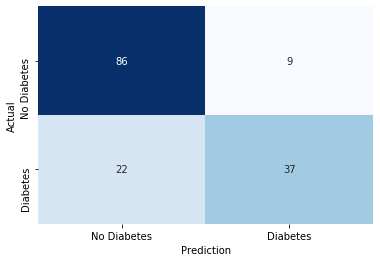

In [42]:
y_test_pred = model.predict_classes(X_test)
cm = confusion_matrix(y_test,y_test_pred)
ax = sns.heatmap(cm, annot=True, xticklabels=["No Diabetes",'Diabetes'], yticklabels=['No Diabetes','Diabetes'],
                cbar=False,cmap='Blues')
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
plt.show()

### ROC Curve

In [45]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_test_pred_probs = model.predict(X_test)

In [46]:
FPR, TPR, _ = roc_curve(y_test,y_test_pred_probs)

Text(0, 0.5, 'True Positive Rate')

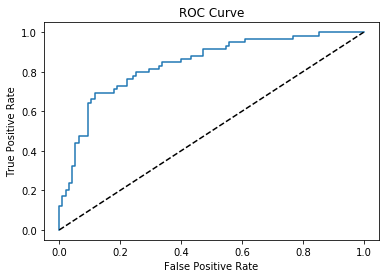

In [48]:
plt.plot(FPR,TPR)
plt.plot([0,1],[0,1],'--',color='black')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')